In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
dataset.columns=df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
#Independent variables
X=dataset
y=df.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [22]:
#train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_train

array([0.511, 1.341, 1.736, ..., 0.916, 2.64 , 1.124])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse

array([-0.52587438, -0.56602885, -0.53538495, -0.51888801, -0.5077624 ])

In [35]:
np.mean(mse)

-0.5307877164222352

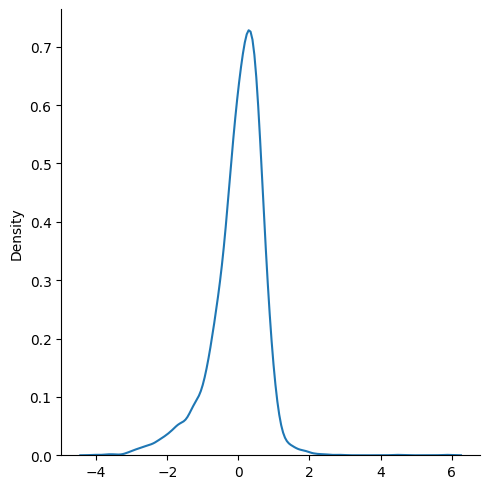

In [41]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [36]:
y_pred=regression.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.370547120203482

## Ridge Regression


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [51]:
parameters={'alpha':[1,2,5,10,20,30,40,50]}
ridge_cv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [54]:
ridge_cv.best_params_

{'alpha': 20}

In [55]:
ridge_cv.best_score_

-0.5307286408317703

In [56]:
ridge_pred=ridge_cv.predict(X_test)
ridge_pred

array([3.58058937, 3.0073186 , 2.21928347, ..., 1.03312851, 1.32419895,
       1.59132841])

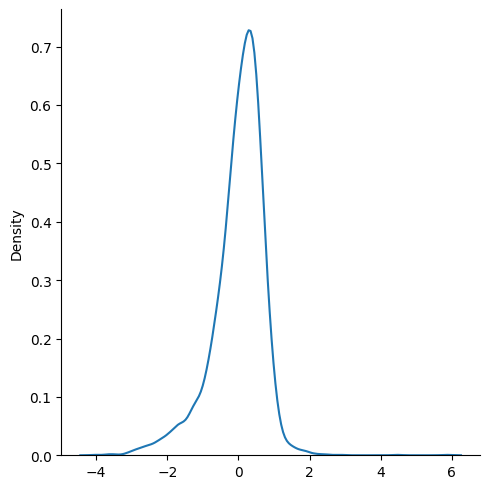

In [57]:
sns.displot(ridge_pred-y_test,kind='kde')

In [59]:
score=r2_score(ridge_pred,y_test)
score

0.3659622424655774

## lasso Regression


In [60]:
from sklearn.linear_model import Lasso


In [61]:
lasso=Lasso()

In [69]:
parameters={'alpha':[1,3,4,5,10,15,20,25,30]}
lasso_cv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(X_train,y_train)
lasso_cv.best_params_


{'alpha': 1}

In [68]:
lasso_cv.best_score_

-1.3256321383961998

In [70]:
lasso_pred=lasso_cv.predict(X_test)
lasso_pred

array([2.06223659, 2.06223659, 2.06223659, ..., 2.06223659, 2.06223659,
       2.06223659])

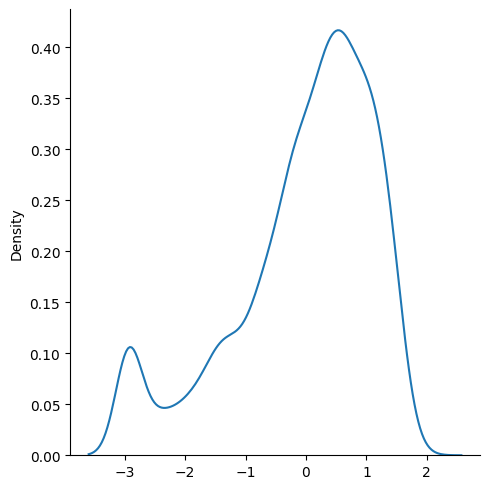

In [72]:
sns.displot(lasso_pred-y_test,kind='kde')

In [71]:
lasso_score=r2_score(lasso_pred,y_test)
lasso_score

-6.873648698565743e+30